In [67]:
import matplotlib.pyplot as plt
# from erddapClient import ERDDAP_Griddap
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import cmocean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors

In [68]:
# Global Ocean Colour (Copernicus-GlobColour), Bio-Geo-Chemical, L4 (monthly and interpolated) from Satellite Observations (Near Real Time)
file_id = Dataset('/home/jamie/projects/climate/data/chl/cli_stl_mon_20240902.nc')
ras = file_id.variables["CHL"][:]
time = file_id.variables["time"][:]
lat = file_id.variables["latitude"][:]
lon = file_id.variables["longitude"][:]
file_id.close()

In [61]:
### Subsetting just the summer. 
timedelta_vector = (time * np.timedelta64(1, 'D')).astype('timedelta64[ns]')
# Add to base date
base_date = np.datetime64('1970-01-01')
date_vector = base_date + timedelta_vector

# Convert the time vector to a Pandas datetime object
date_vec_pd = pd.to_datetime(date_vector)

# Identify the indices for the summer months (June to October)
summer_indices = (date_vec_pd.month >= 6) & (date_vec_pd.month <= 10)

# Subset the 3D array using the summer indices
ras = ras[summer_indices, :, :]
time = time[summer_indices,]

ras = np.nanmean(ras, axis = 0)
# Time vector (e.g., 10 time points)

In [62]:

# convert to xarray. 
ras = xr.DataArray(ras, 
                   coords={'x': lat, 'y':lon}, 
                   dims=["x", "y"])

#ras = ras.clip(min = -0.004, max = 0.007, keep_attrs=True)

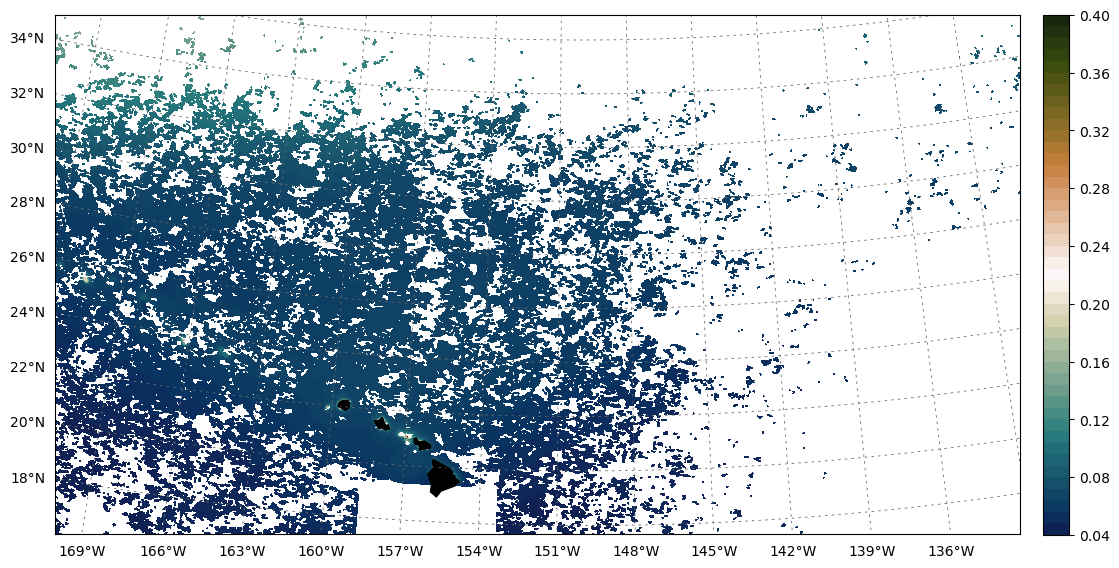

In [64]:
# divnorm = colors.TwoSlopeNorm(vmin = np.nanmin(ras.data), vcenter = 0, vmax = np.nanmax(ras.data))

# Calculate the bounds of the data
lon_bounds = [ras.y.min(), ras.y.max()]
lat_bounds = [ras.x.min(), ras.x.max()]

fig, (ax1) = plt.subplots(1, 1, figsize=(15, 7))
m = Basemap(projection='lcc', resolution='l', 
            llcrnrlat=16, urcrnrlat=35.5, 
            llcrnrlon=-170, urcrnrlon=-130,
            lat_0 = 30, lon_0 = -150,
            width=5.1E6, height=5E6)

# Convert latitude and longitude to map projection coordinates.
x_map, y_map = np.meshgrid(ras.y, ras.x)
x, y = m(x_map, y_map)
# Plot data.
contour = m.contourf(x, y, ras, cmap = cmocean.cm.tarn_r, levels=100, extend='both') #, norm=divnorm)
m.fillcontinents(color = 'black')
# Add grid lines
parallels = m.drawparallels(np.arange(18, 40, 2), labels=[1,0,0,0], textcolor = 'black', color = "dimgrey", fontsize=10, dashes=(3, 5), linewidth = 0.6)
meridians =  m.drawmeridians(np.arange(-175, -130, 3), labels=[0,0,0,1], textcolor = 'black', color = "dimgrey", fontsize=10, dashes=(3, 5),linewidth = 0.6)
# Draw parallels and meridians with customized gridline alpha and label colors
m.drawcoastlines(color='black')
# add colorbar.
c = ax1.contourf(ras.y, ras.x, ras, levels = 50, cmap = cmocean.cm.tarn_r) #, norm=divnorm)
cbar = fig.colorbar(c, shrink = 0.965, pad = 0.02)
# plt.title("Summertime mean chlorophyll anomaly from 1997 to 2023 [$mg$ $m^{-3}$]")
# plt.savefig('../figures/climatology_chl_20240813.png', bbox_inches='tight', dpi=300)
plt.show()